Méthode du perceptron mutlicouche (multilayer perceptron) qui est un type de réseau neuronal artificiel où l'information ne circule que dans un seul sens.

Accuracy 1 : 0.9298245614035088
Accuracy 2 : 0.9502923976608187
AUC 1 :  0.9613175675675676
AUC 2 :  0.9818318318318319


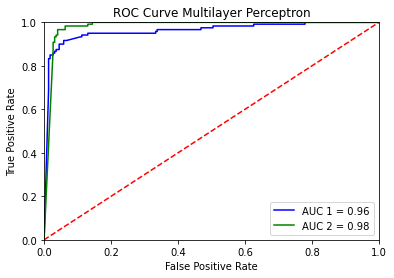

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iteration

[['k (nb voisins)', 'w (poids)', 'a (algorithme))', 'AUC'], [(2, 2), 0.0001, 'lbfgs', 0.5], [(2, 2), 0.0001, 'sgd', 0.449306], [(2, 2), 0.0001, 'adam', 0.452965], [(2, 2), 1e-05, 'lbfgs', 0.5], [(2, 2), 1e-05, 'sgd', 0.449306], [(2, 2), 1e-05, 'adam', 0.452965], [(2, 2), 1e-06, 'lbfgs', 0.5], [(2, 2), 1e-06, 'sgd', 0.449306], [(2, 2), 1e-06, 'adam', 0.452965], [(2, 3), 0.0001, 'lbfgs', 0.5], [(2, 3), 0.0001, 'sgd', 0.656644], [(2, 3), 0.0001, 'adam', 0.618844], [(2, 3), 1e-05, 'lbfgs', 0.5], [(2, 3), 1e-05, 'sgd', 0.656644], [(2, 3), 1e-05, 'adam', 0.618844], [(2, 3), 1e-06, 'lbfgs', 0.5], [(2, 3), 1e-06, 'sgd', 0.656644], [(2, 3), 1e-06, 'adam', 0.618844], [(2, 4), 0.0001, 'lbfgs', 0.502252], [(2, 4), 0.0001, 'sgd', 0.990991], [(2, 4), 0.0001, 'adam', 0.990691], [(2, 4), 1e-05, 'lbfgs', 0.502252], [(2, 4), 1e-05, 'sgd', 0.990991], [(2, 4), 1e-05, 'adam', 0.990691], [(2, 4), 1e-06, 'lbfgs', 0.502252], [(2, 4), 1e-06, 'sgd', 0.990991], [(2, 4), 1e-06, 'adam', 0.990691], [(2, 5), 0.0001,

TypeError: Unsupported type <class 'tuple'> in write()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
#import matplotlib.patches as mpatches
import numpy as np
import scipy.io as sp
#from sklearn.decomposition import PCA
import xlsxwriter

#Traitement du fichier .mat
cancercell = sp.loadmat('breastw.mat')
X = cancercell['X']
y = cancercell['y']
#print(cancercell)
y=np.reshape(y,(683,))
#Séparation des données d'apprentissage et des données tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
#fin traitement mat

#Algorithme Réseau de neurones = Perceptron multicouches

# Solver : Algorithme choisit pour entraîner le réseaux. 
#       Lbfgs = optimiseur de la famille des méthodes quasi Nexton
#       sgd = descente de gradient stochastique
#       adam = optimiseur basé sur le gradient stochastique proposé par Kingma, Diederik et Jimmy Ba
# hidden_layer_sizes : nombre de couches cachées et le nombre de neurones par couche cachée
# Alpha : pas,vitesse avec laquelle l'algo va apprendre, Plus il sera petit, plus le réseau va prendre du temps pour converger vers la solution.
# Random_state : état aléatoire d'initialisation du réseau.

#Modèle1
mlp1 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8, 2), random_state=1)
mlp1.fit(X_train, y_train)
prediction1 = mlp1.predict(X_test)

#Modèle2
mlp2 = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(9, 2), random_state=1) #modif du nombre de couches cachées par ex ici 9
mlp2.fit(X_train, y_train)
prediction2 = mlp2.predict(X_test)

#Accuracy
result1 = accuracy_score(y_test,prediction1)
print("Accuracy 1 :",result1)

result2 = accuracy_score(y_test,prediction2)
print("Accuracy 2 :",result2)

#ROC curve
#Modèle 1 et 2 
y_scores1 = mlp1.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores1[:, 1])
roc_auc = auc(fpr, tpr)
print("AUC 1 : ", roc_auc)

y_scores2 = mlp2.predict_proba(X_test)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_scores2[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("AUC 2 : ", roc_auc2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC 1 = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'g', label = 'AUC 2 = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve Multilayer Perceptron')
plt.show()


def create(row, col):
    return [[[]for _ in range(col)]  for _ in range(row)]


HLS=[]
for j in range(2,10):
    for k in range(2,10):
        HLS.append((j,k))
Alpha = [10**(-k) for k in range(4,7)]
Solver = ['lbfgs', 'sgd','adam']
MC = create(3*len(HLS)*len(Alpha)+1,4)
MC[0][0]='k (nb voisins)'
MC[0][1]='w (poids)'
MC[0][2]='a (algorithme))'
MC[0][3]='AUC'
i=1

for k in HLS:
    for a in Alpha:
        for s in Solver:
            MC[i][0]= k
            MC[i][1]= a
            MC[i][2]= s

            #algo prédiction
            model = MLPClassifier(solver= s, alpha= a, hidden_layer_sizes= k, random_state=1)
            model.fit(X_train,y_train)
            prediction= model.predict(X_test)
            y_scores = model.predict_proba(X_test)

            
            #  ROC curve
            fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
            roc_auc = auc(fpr, tpr)
            MC[i][3]=(round(roc_auc, 6))

            
            i += 1 

print(MC)
workbook = xlsxwriter.Workbook('Comparaison matrice Perceptron Multicouches.xlsx')
worksheet = workbook.add_worksheet()
col = 0
for row, data in enumerate(MC):
    worksheet.write_row(row, col, data)
workbook.close()

